In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plot

raw_data = pd.read_csv("/Users/joshuacordero/FinalProject/NYPD_Arrest_Data__Year_to_Date_.csv")
raw_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [3]:
raw_data.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         21
PD_DESC                       61
KY_CD                         61
OFNS_DESC                     61
LAW_CODE                       0
LAW_CAT_CD                  1078
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

Columns that contain missing values are irrelevant to the contents I hope to present in the project so I can drop them.

In [4]:
raw_data.dropna(axis=1)

,ARREST_KEY,ARREST_DATE,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,PL 1211200,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,PL 1303501,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,PL 1200501,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,PL 1200001,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,PL 1200001,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,PL 1200501,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,PL 1200502,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,VTL0511001,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,PL 1552500,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)


In [5]:
#extract only year from date data so I can strictly focus on year 2021
#extract month in order for later use in graph to show volumes of crime per month to show hot months
raw_data['date'] = pd.to_datetime(raw_data['ARREST_DATE'],format="%m/%d/%Y")
raw_data['year'] = pd.DatetimeIndex(raw_data['ARREST_DATE']).year
raw_data['month'] = pd.DatetimeIndex(raw_data['ARREST_DATE']).month

df = raw_data[raw_data['year'] == 2021]

df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,date,year,month
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,...,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003),2021-09-29,2021,9
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,...,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),2021-09-27,2021,9
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,...,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003),2021-09-25,2021,9
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,...,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007),2021-09-25,2021,9
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,...,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005),2021-09-25,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,...,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005),2021-01-06,2021,1
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,...,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003),2021-01-05,2021,1
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,...,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056),2021-01-01,2021,1
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,...,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007),2021-01-07,2021,1


M    95849
F    19450
Name: PERP_SEX, dtype: int64

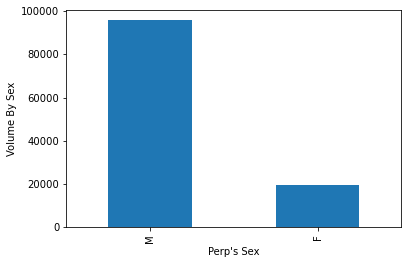

In [6]:
crimes_by_sex = df['PERP_SEX'].value_counts()
cbs = crimes_by_sex.plot.bar()
cbs.set_xlabel("Perp's Sex")
cbs.set_ylabel("Volume By Sex")
crimes_by_sex




Text(0, 0.5, 'Volume by Age Group')

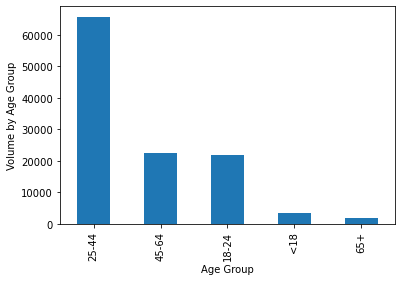

In [7]:
#Dataset already contains age ranges for each crime so I will use those

crimes_by_age = df['AGE_GROUP'].value_counts()
cba = crimes_by_age.plot.bar()
cba.set_xlabel("Age Group")
cba.set_ylabel("Volume by Age Group")


Text(0, 0.5, 'Volume by Race')

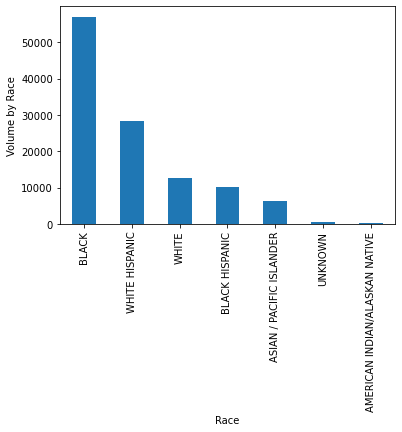

In [8]:
crimes_by_race = df['PERP_RACE'].value_counts()
cbr = crimes_by_race.plot.bar()
cbr.set_xlabel("Race")
cbr.set_ylabel("Volume by Race")

Text(0, 0.5, 'Volume by Borough')

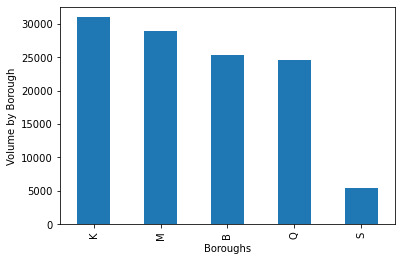

In [9]:
crimes_by_boro = df['ARREST_BORO'].value_counts()
cbb = crimes_by_boro.plot.bar()
cbb.set_xlabel("Boroughs")
cbb.set_ylabel("Volume by Borough")

	Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

Text(0, 0.5, 'Volume by Jurisdiction')

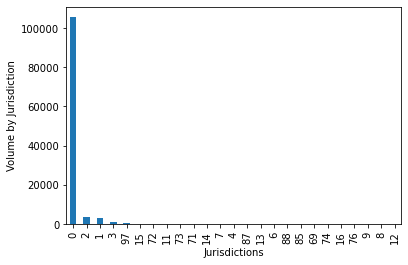

In [10]:
crimes_by_jurisdiction = df['JURISDICTION_CODE'].value_counts()
cbj = crimes_by_jurisdiction.plot.bar()
cbj.set_xlabel("Jurisdictions")
cbj.set_ylabel("Volume by Jurisdiction")

Text(0, 0.5, 'Volume by Precinct')

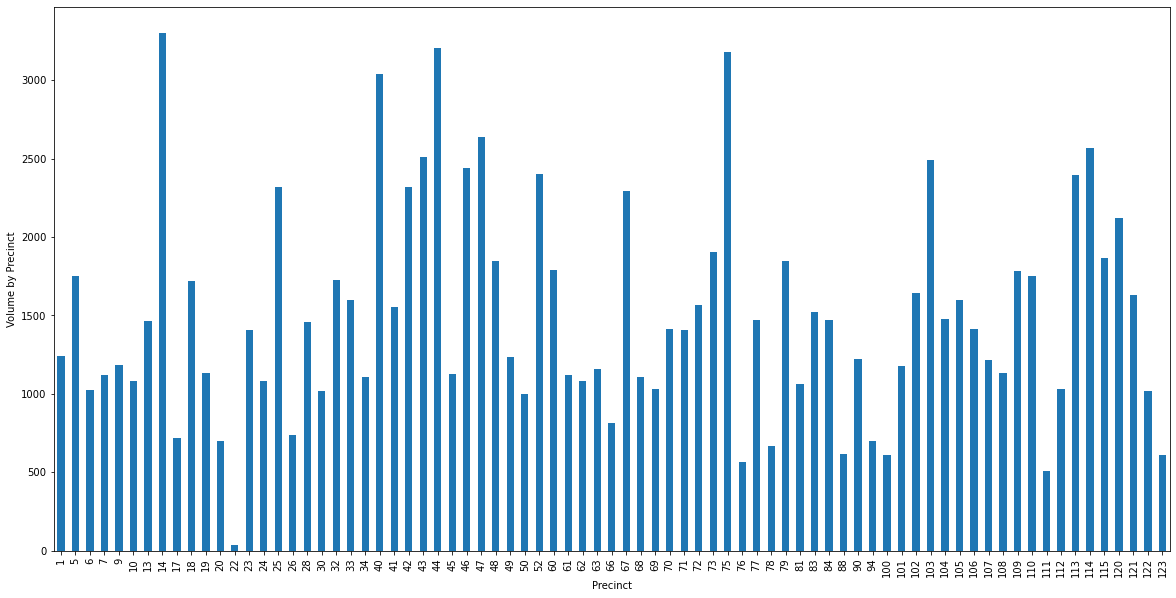

In [11]:
crimes_by_precinct = df['ARREST_PRECINCT'].value_counts().sort_index()
cbj = crimes_by_precinct.plot.bar(figsize=(20,10))
cbj.set_xlabel("Precinct")
cbj.set_ylabel("Volume by Precinct")

Text(0, 0.5, 'Volume by Month')

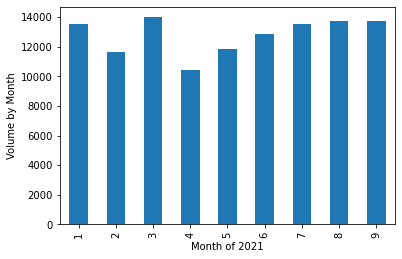

In [12]:
crimes_by_month = df['month'].value_counts().sort_index()
cbm = crimes_by_month.plot.bar()
cbm.set_xlabel("Month of 2021")
cbm.set_ylabel("Volume by Month")

At the time this dataset was used, it has not been updated for the final quarter of 2021. Therefore, the last three months of data are missing.

In [13]:
def round_to_3_decimals(x):
    return round(x, 3)

df['Latitude'] = df['Latitude'].apply(round_to_3_decimals)
df['Longitude'] = df['Longitude'].apply(round_to_3_decimals)

In [14]:
crimes_loc = df.groupby(['Latitude','Longitude'])['ARREST_KEY'].count()

crimes_loc = pd.DataFrame(crimes_loc)
crimes_loc = crimes_loc.reset_index()

In [15]:
import folium

In [16]:
from folium.plugins import HeatMap

crimes_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)

hm_wide = HeatMap(list(zip(crimes_loc['Latitude'], 
                           crimes_loc['Longitude'],
                           crimes_loc['ARREST_KEY'])),
                  min_opacity = 0.2,
                  radius = 5, blur = 15,
                  max_zoom = 1)

crimes_map.add_child(hm_wide)

crimes_map

This map shows crime represented in the form of a heatmap. Darker areas reflect higher concentration of crimes.